<a href="https://colab.research.google.com/github/apg-praveen/MajorProject_IITM/blob/main/Major_Project_GUVI_IITM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/chennai_house_sale_data.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# EDA

In [3]:
df.shape

(7109, 22)

In [4]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

### PRT_ID

Removing PRT_ID

Since, it is not required to build the model and might also cause over-fitting.

In [6]:
df.drop('PRT_ID', axis = 1,  inplace = True)
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


### AREA

* Checking NULL Values
* Checking Spellings

In [7]:
df.AREA.isnull().sum()

0

In [8]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

Note:

* Karapakkam
* Anna Nagar
* Adyar
* Velachery
* Chrompet
* KK Nagar
* T Nagar

In [9]:
df.AREA.replace({'Karapakam': 'Karapakkam',
                 'Ann Nagar': 'Anna Nagar',
                 'Ana Nagar': 'Anna Nagar',
                 'Adyr': 'Adyar',
                 'Velchery': 'Velachery',
                 'Chrompt': 'Chrompet',
                 'Chrmpet': 'Chrompet',
                 'Chormpet': 'Chrompet',
                 'KKNagar': 'KK Nagar',
                 'TNagar': 'T Nagar'}, inplace = True)
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

### INT_SQFT

In [10]:
df.INT_SQFT.isnull().sum()

0

In [11]:
df.INT_SQFT.dtype

dtype('int64')

In [12]:
df.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

* No Outliers

### DATE_SALE

In [13]:
df.DATE_SALE.isnull().sum()

0

In [14]:
df.DATE_SALE.dtype

dtype('O')

In [15]:
df.DATE_SALE[0]

'04-05-2011'

In [16]:
df.DATE_SALE = pd.to_datetime(df.DATE_SALE)
df.DATE_SALE[0]

Timestamp('2011-04-05 00:00:00')

### DATE_BUILD

In [17]:
df.DATE_BUILD.isnull().sum()

0

In [18]:
df.DATE_BUILD.dtype

dtype('O')

In [19]:
df.DATE_BUILD[0]

'15-05-1967'

In [20]:
df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD)
df.DATE_BUILD[0]

Timestamp('1967-05-15 00:00:00')

### Buiding Age -> AGE

Now, we calculate the age of building using Date_Build and Date_Sale and drop those Columns

In [21]:
df['AGE'] = df.DATE_SALE.dt.year - df.DATE_BUILD.dt.year
df.drop(columns = ['DATE_BUILD', 'DATE_SALE'], inplace = True)
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30


In [22]:
df['AGE']

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: AGE, Length: 7109, dtype: int64

### DIST_MAINROAD

In [23]:
df.DIST_MAINROAD.isnull().sum()

0

In [24]:
df.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

* No Outliers and NULL Values

### N_BEDROOM

In [25]:
df.N_BEDROOM.isnull().sum()

1

In [26]:
df['N_BEDROOM'] = df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0])
df.N_BEDROOM.isnull().sum()

0

In [27]:
df.N_BEDROOM.describe()

count    7109.000000
mean        1.636939
std         0.802881
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

* No Outliers and we have imputed NULL Values with the Mode

In [28]:
df.N_BEDROOM = df.N_BEDROOM.astype('int64')
df.N_BEDROOM.dtype

dtype('int64')

### N_BATHROOM

In [29]:
df.N_BATHROOM.isnull().sum()

5

In [30]:
df['N_BATHROOM'] = df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0])
df.N_BATHROOM.isnull().sum()

0

In [31]:
df.N_BATHROOM.describe()

count    7109.000000
mean        1.213110
std         0.409534
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: N_BATHROOM, dtype: float64

* No Outliers and imputed NULL Values with Mode

In [32]:
df.N_BATHROOM = df.N_BATHROOM.astype('int64')
df.N_BATHROOM.dtype

dtype('int64')

### N_ROOM

In [33]:
df.N_ROOM.isnull().sum()

0

In [34]:
df.N_ROOM.describe()

count    7109.000000
mean        3.688704
std         1.019099
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

* No NULL Values
* No Outliers

In [35]:
df.N_ROOM = df.N_ROOM.astype('int64')
df.N_ROOM.dtype

dtype('int64')

### SALE_COND

In [36]:
df.SALE_COND.isnull().sum()

0

In [37]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [38]:
df.SALE_COND.replace({
    'AbNormal': 'Abnormal',
    'Ab Normal': 'Abnormal',
    'AdjLand': 'Adj Land',
    'Partiall': 'Partial',
    'PartiaLl': 'Partial'
}, inplace = True)
df.SALE_COND.unique()

array(['Abnormal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

* No NULL Values
* Corrected Spelling mistakes

### PARK_FACIL

In [39]:
df.PARK_FACIL.isnull().sum()

0

In [40]:
df.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [41]:
df.PARK_FACIL.replace('Noo','No', inplace = True)
df.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

In [42]:
df.PARK_FACIL.describe()

count     7109
unique       2
top        Yes
freq      3587
Name: PARK_FACIL, dtype: object

* Corrected Spelling mistake -> Noo

### BUILDTYPE

In [43]:
df.BUILDTYPE.isnull().sum()

0

In [44]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [45]:
df.BUILDTYPE.replace({
    'Others': 'Other',
    'Comercial': 'Commercial'
}, inplace = True)
df.BUILDTYPE.unique()

array(['Commercial', 'Other', 'House'], dtype=object)

In [46]:
df.BUILDTYPE.describe()

count      7109
unique        3
top       House
freq       2444
Name: BUILDTYPE, dtype: object

* No NULL Values
* Corrected spelling mistakes
* Majority Building Type is "House"

### UTILITY_AVAIL

In [47]:
df.UTILITY_AVAIL.isnull().sum()

0

In [48]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [49]:
df.UTILITY_AVAIL.replace({
    'AllPub': 'All Pub',
    'NoSewr ': 'NoSewr',
    'NoSeWa': 'NoSewa'}, inplace = True)
df.UTILITY_AVAIL.unique()

array(['All Pub', 'ELO', 'NoSewr', 'NoSewa'], dtype=object)

In [50]:
df.UTILITY_AVAIL.describe()

count        7109
unique          4
top       All Pub
freq         1887
Name: UTILITY_AVAIL, dtype: object

* No NULL Values
* Corrected the Spelling Mistake
* Majority is 'All Pub'

### STREET

In [51]:
df.STREET.isnull().sum()

0

In [52]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [53]:
df.STREET.replace({
    'Pavd': 'Paved',
    'NoAccess': 'No Access'
}, inplace = True)

df.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [54]:
df.STREET.describe()

count      7109
unique        3
top       Paved
freq       2572
Name: STREET, dtype: object

* No NULL Values
* Corrected Spelling Mistakes
* Majority of Street type is 'Paved'

### MZZONE

In [55]:
df.MZZONE.isnull().sum()

0

In [56]:
df.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

A: Agriculture

I: Industrial

C: Commercial

RH, RM, RL: Residential (High, Medium, Low DENSITY)

### SALES_PRICE

In [57]:
df.SALES_PRICE.isnull().sum()

0

In [58]:
df.SALES_PRICE.describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

### REG_FEE & COMMIS

**Dropping REG_FEE and COMMIS** - It doesn't makes sense as this is not known before we actually sell the house

In [59]:
df.drop(['REG_FEE', 'COMMIS'], axis = 1,  inplace = True)
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

### QS_OVERALL

In [60]:
df.QS_OVERALL.isnull().sum()

48

In [61]:
df['QS_OVERALL'] = df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())
df.QS_OVERALL.isnull().sum()

0

In [62]:
df.QS_OVERALL.describe()

count    7109.000000
mean        3.503254
std         0.525440
min         2.000000
25%         3.130000
50%         3.503254
75%         3.880000
max         4.970000
Name: QS_OVERALL, dtype: float64

### QS_ROOMS

In [63]:
df.QS_ROOMS.isnull().sum()

0

In [64]:
df.QS_ROOMS.describe()

count    7109.000000
mean        3.517471
std         0.891972
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_ROOMS, dtype: float64

### QS_BATHROOM

In [65]:
df.QS_BATHROOM.isnull().sum()

0

In [66]:
df.QS_BATHROOM.describe()

count    7109.000000
mean        3.507244
std         0.897834
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BATHROOM, dtype: float64

### QS_BEDROOM

In [67]:
df.QS_BEDROOM.isnull().sum()

0

In [68]:
df.QS_BEDROOM.describe()

count    7109.000000
mean        3.485300
std         0.887266
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BEDROOM, dtype: float64

In [69]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,131,1,1,3,Abnormal,Yes,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2,1,5,Abnormal,No,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1,1,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3,2,5,Family,No,Other,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1,1,3,Abnormal,Yes,Other,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   int64  
 4   N_BATHROOM     7109 non-null   int64  
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   object 
 7   PARK_FACIL     7109 non-null   object 
 8   BUILDTYPE      7109 non-null   object 
 9   UTILITY_AVAIL  7109 non-null   object 
 10  STREET         7109 non-null   object 
 11  MZZONE         7109 non-null   object 
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7109 non-null   float64
 16  SALES_PRICE    7109 non-null   int64  
 17  AGE            7109 non-null   int64  
dtypes: float

# Data Viz.

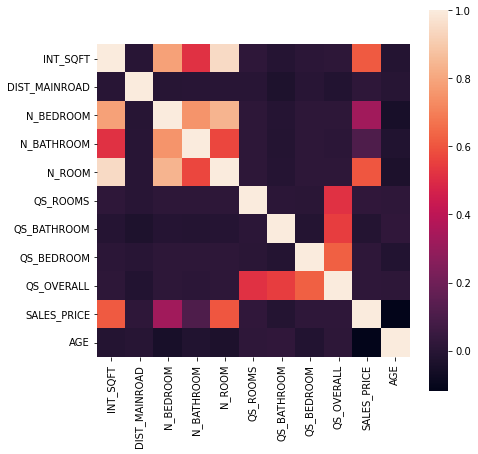

In [71]:
corr = df.corr()
f, ax = plt.subplots(figsize = (7, 7))
sns.heatmap(corr, vmax = 1.0, square= True)

Linear Relation:
* INT_SQFT - N_BEDROOM - N_BATHROOM - N-ROOM

## Viz. Numerical Data



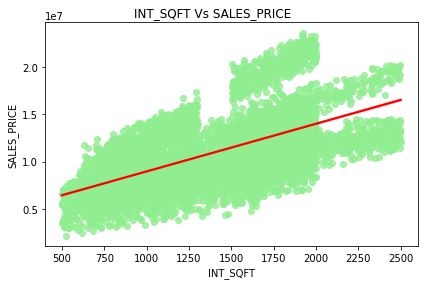

In [72]:
sns.regplot(x= df.INT_SQFT, y= df.SALES_PRICE, scatter_kws={"color": "#90ee90"}, line_kws={"color": "red"})
plt.suptitle('INT_SQFT Vs SALES_PRICE')
plt.tight_layout()
plt.show()

* There is a Positive linear Relationship between INT_SQFT and SALES_PRICE
* As the SQFT Area increases, the Sale Price would increase as shown in the plot

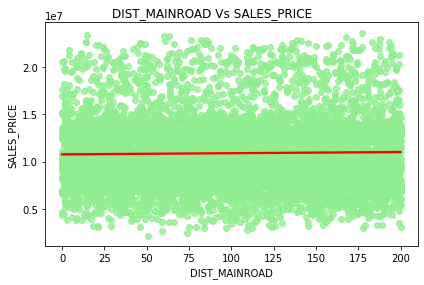

In [73]:
sns.regplot(x= df.DIST_MAINROAD, y= df.SALES_PRICE, scatter_kws={"color": "#90ee90"}, line_kws={"color": "red"})
plt.suptitle('DIST_MAINROAD Vs SALES_PRICE')
plt.tight_layout()
plt.show()

* There seems no relation between DIST_MAINROAD and SALES_PRICE
* Hence, we will drop this column!

In [74]:
df.drop('DIST_MAINROAD', axis= 1, inplace = True)
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE',
       'AGE'],
      dtype='object')

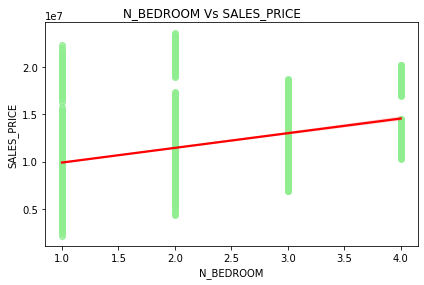

In [75]:
sns.regplot(x= df.N_BEDROOM, y= df.SALES_PRICE, scatter_kws={"color": "#90ee90"}, line_kws={"color": "red"})
plt.suptitle('N_BEDROOM Vs SALES_PRICE')
plt.tight_layout()
plt.show()

* The red line shows the plot of average values
* There is a Positive Linear Relation
* As the number of Bedrooms increases there is a considerable increase in the Sale Price

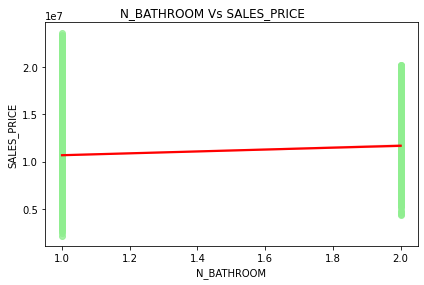

In [76]:
sns.regplot(x= df.N_BATHROOM, y= df.SALES_PRICE, scatter_kws={"color": "#90ee90"}, line_kws={"color": "red"})
plt.suptitle('N_BATHROOM Vs SALES_PRICE')
plt.tight_layout()
plt.show()

* Here, there is a slight Positive Linear Relation
* The Number of bathrooms also effect the Sale Price but not to a considerable extent

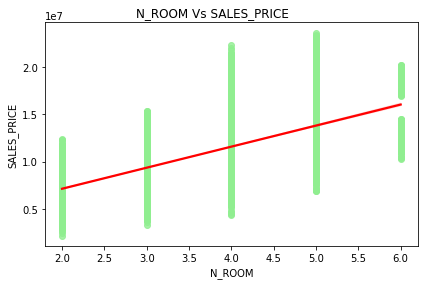

In [77]:
sns.regplot(x= df.N_ROOM, y= df.SALES_PRICE, scatter_kws={"color": "#90ee90"}, line_kws={"color": "red"})
plt.suptitle('N_ROOM Vs SALES_PRICE')
plt.tight_layout()
plt.show()

* There is a Positive Linear Relation between N_ROOM and SALES_PRICE
* As the Number of Rooms increases, the Sales Price would be increasing

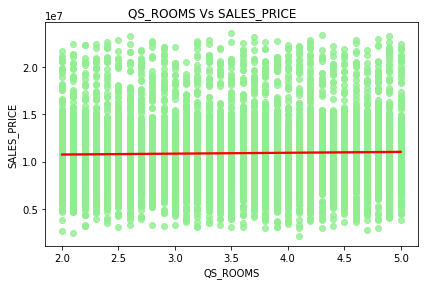

In [78]:
sns.regplot(x= df.QS_ROOMS, y= df.SALES_PRICE, scatter_kws={"color": "#90ee90"}, line_kws={"color": "red"})
plt.suptitle('QS_ROOMS Vs SALES_PRICE')
plt.tight_layout()
plt.show()

* There seems no relation between QS_ROOMS and SALES_PRICE
* Hence, we will drop this column!

In [79]:
df.drop('QS_ROOMS', axis= 1, inplace = True)
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

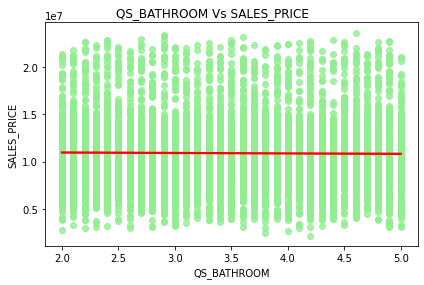

In [80]:
sns.regplot(x= df.QS_BATHROOM, y= df.SALES_PRICE, scatter_kws={"color": "#90ee90"}, line_kws={"color": "red"})
plt.suptitle('QS_BATHROOM Vs SALES_PRICE')
plt.tight_layout()
plt.show()

* There seems no relation between QS_BATHROOM and SALES_PRICE
* Hence, we will drop this column!

In [81]:
df.drop('QS_BATHROOM', axis= 1, inplace = True)
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

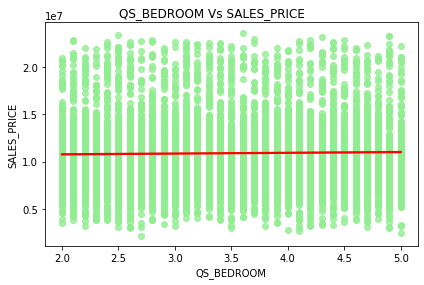

In [82]:
sns.regplot(x= df.QS_BEDROOM, y= df.SALES_PRICE, scatter_kws={"color": "#90ee90"}, line_kws={"color": "red"})
plt.suptitle('QS_BEDROOM Vs SALES_PRICE')
plt.tight_layout()
plt.show()

* There seems no relation between QS_BEDROOM and SALES_PRICE
* Hence, we will drop this column!

In [83]:
df.drop('QS_BEDROOM', axis= 1, inplace = True)
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

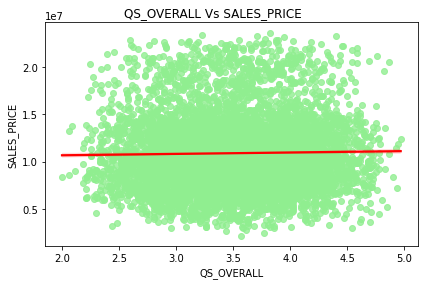

In [84]:
sns.regplot(x= df.QS_OVERALL, y= df.SALES_PRICE, scatter_kws={"color": "#90ee90"}, line_kws={"color": "red"})
plt.suptitle('QS_OVERALL Vs SALES_PRICE')
plt.tight_layout()
plt.show()

* There seems no relation between QS_OVERALL and SALES_PRICE
* Hence, we will drop this column!

In [85]:
df.drop('QS_OVERALL', axis= 1, inplace = True)
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'SALES_PRICE', 'AGE'],
      dtype='object')

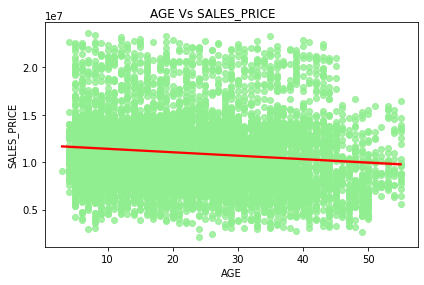

In [86]:
sns.regplot(x= df.AGE, y= df.SALES_PRICE, scatter_kws={"color": "#90ee90"}, line_kws={"color": "red"})
plt.suptitle('AGE Vs SALES_PRICE')
plt.tight_layout()
plt.show()

* There is a Negative Linear Relation between AGE and SALES_PRICE
* As the age of house increases, the Sales Price would decrease

## Viz. Categorical Data

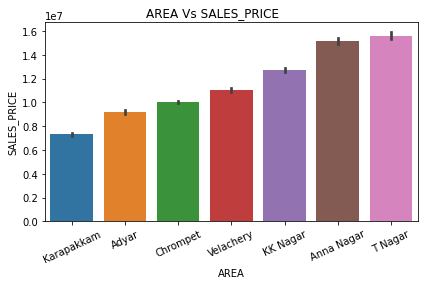

In [87]:
sns.barplot(x= df.AREA, y= df.SALES_PRICE, order= df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.suptitle('AREA Vs SALES_PRICE')
plt.xticks(rotation= 25)
plt.tight_layout()
plt.show()

* There is Linear relation between Area and Sale Price
* We will do label encoding, with high priority being 'T Nagar'

In [88]:
df.AREA = df.AREA.map({'Karapakkam': 1, 'Adyar': 2, 'Chrompet': 3, 'Velachery': 4, 'KK Nagar': 5, 'Anna Nagar': 6, 'T Nagar': 7})
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE
0,1,1004,1,1,3,Abnormal,Yes,Commercial,All Pub,Paved,A,7600000,44
1,6,1986,2,1,5,Abnormal,No,Commercial,All Pub,Gravel,RH,21717770,11
2,2,909,1,1,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,13159200,20
3,4,1855,3,2,5,Family,No,Other,NoSewr,Paved,I,9630290,22
4,1,1226,1,1,3,Abnormal,Yes,Other,All Pub,Gravel,C,7406250,30


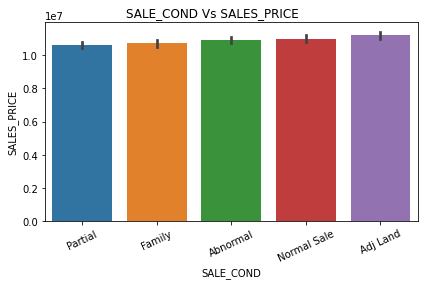

In [89]:
sns.barplot(x= df.SALE_COND, y= df.SALES_PRICE, order= df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.suptitle('SALE_COND Vs SALES_PRICE')
plt.xticks(rotation= 25)
plt.tight_layout()
plt.show()

* There is a slight linear relation between Sale Condition and Sales Price
* We will do label encoding here as well

In [90]:
df.SALE_COND = df.SALE_COND.map({'Partial': 1, 'Family': 2, 'Abnormal': 3, 'Normal Sale': 4, 'Adj Land': 5})
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE
0,1,1004,1,1,3,3,Yes,Commercial,All Pub,Paved,A,7600000,44
1,6,1986,2,1,5,3,No,Commercial,All Pub,Gravel,RH,21717770,11
2,2,909,1,1,3,3,Yes,Commercial,ELO,Gravel,RL,13159200,20
3,4,1855,3,2,5,2,No,Other,NoSewr,Paved,I,9630290,22
4,1,1226,1,1,3,3,Yes,Other,All Pub,Gravel,C,7406250,30


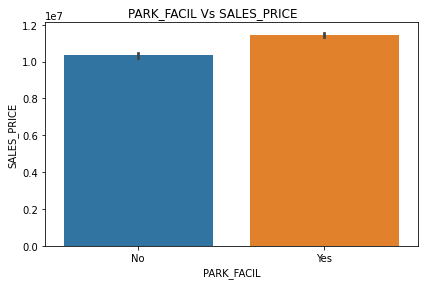

In [91]:
sns.barplot(x= df.PARK_FACIL, y= df.SALES_PRICE, order= df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.suptitle('PARK_FACIL Vs SALES_PRICE')
plt.tight_layout()
plt.show()

* There is a linear relation between Parking Facility and Sales Price
* Since this is a binary categorical variable, we will do Label encoding

In [92]:
df.PARK_FACIL = df.PARK_FACIL.map({'No': 0, 'Yes': 1})
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE
0,1,1004,1,1,3,3,1,Commercial,All Pub,Paved,A,7600000,44
1,6,1986,2,1,5,3,0,Commercial,All Pub,Gravel,RH,21717770,11
2,2,909,1,1,3,3,1,Commercial,ELO,Gravel,RL,13159200,20
3,4,1855,3,2,5,2,0,Other,NoSewr,Paved,I,9630290,22
4,1,1226,1,1,3,3,1,Other,All Pub,Gravel,C,7406250,30


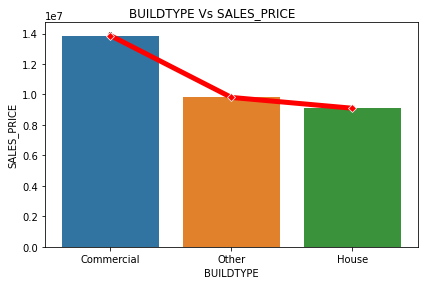

In [93]:
sns.barplot(x= df.BUILDTYPE, y= df.SALES_PRICE)
sns.lineplot(x= df.BUILDTYPE, y= df.SALES_PRICE, color='r', marker='D', linewidth=5, ci=None)
plt.suptitle('BUILDTYPE Vs SALES_PRICE')
plt.tight_layout()
plt.show()

* There is NO Linear relationship between Build Type and Sales Price
* Hence, we will do One-hot encoding

In [94]:
one_hot = pd.get_dummies(df.BUILDTYPE).astype(int)
df = df.join(one_hot)
df.drop('BUILDTYPE', axis= 1, inplace = True)
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,Commercial,House,Other
0,1,1004,1,1,3,3,1,All Pub,Paved,A,7600000,44,1,0,0
1,6,1986,2,1,5,3,0,All Pub,Gravel,RH,21717770,11,1,0,0
2,2,909,1,1,3,3,1,ELO,Gravel,RL,13159200,20,1,0,0
3,4,1855,3,2,5,2,0,NoSewr,Paved,I,9630290,22,0,0,1
4,1,1226,1,1,3,3,1,All Pub,Gravel,C,7406250,30,0,0,1


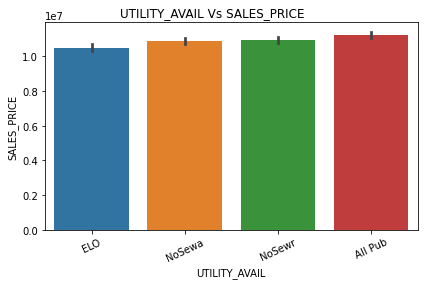

In [95]:
sns.barplot(x= df.UTILITY_AVAIL, y= df.SALES_PRICE, order= df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.suptitle('UTILITY_AVAIL Vs SALES_PRICE')
plt.xticks(rotation= 25)
plt.tight_layout()
plt.show()

* There is a slight Linear relation between Utility Available and Sales Price
* Hence, we will do Label Encoding

In [96]:
df.UTILITY_AVAIL = df.UTILITY_AVAIL.map({'ELO': 1, 'NoSewa': 2, 'NoSewr': 3, 'All Pub': 4})
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,Commercial,House,Other
0,1,1004,1,1,3,3,1,4,Paved,A,7600000,44,1,0,0
1,6,1986,2,1,5,3,0,4,Gravel,RH,21717770,11,1,0,0
2,2,909,1,1,3,3,1,1,Gravel,RL,13159200,20,1,0,0
3,4,1855,3,2,5,2,0,3,Paved,I,9630290,22,0,0,1
4,1,1226,1,1,3,3,1,4,Gravel,C,7406250,30,0,0,1


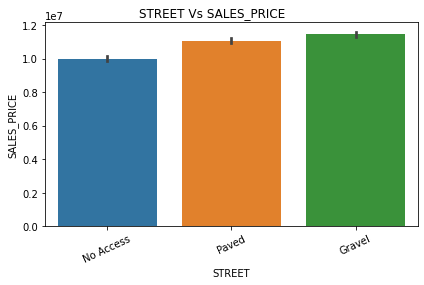

In [97]:
sns.barplot(x= df.STREET, y= df.SALES_PRICE, order= df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.suptitle('STREET Vs SALES_PRICE')
plt.xticks(rotation= 25)
plt.tight_layout()
plt.show()

* There is Linear realtion between Street and Sales Price
* Hence, we will go for Label Encoding

In [98]:
df.STREET = df.STREET.map({'No Access': 1, 'Paved': 2, 'Gravel': 3})
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,Commercial,House,Other
0,1,1004,1,1,3,3,1,4,2,A,7600000,44,1,0,0
1,6,1986,2,1,5,3,0,4,3,RH,21717770,11,1,0,0
2,2,909,1,1,3,3,1,1,3,RL,13159200,20,1,0,0
3,4,1855,3,2,5,2,0,3,2,I,9630290,22,0,0,1
4,1,1226,1,1,3,3,1,4,3,C,7406250,30,0,0,1


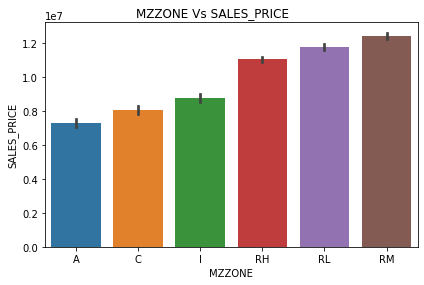

In [99]:
sns.barplot(x= df.MZZONE, y= df.SALES_PRICE, order= df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.suptitle('MZZONE Vs SALES_PRICE')
plt.tight_layout()
plt.show()

* There is Linear relation between MZZONE and Sales Price
* Hence, we will do Label Encoding

In [100]:
df.MZZONE = df.MZZONE.map({'A': 1, 'C': 2, 'I': 3, 'RH': 4, 'RL': 5, 'RM': 6})
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,Commercial,House,Other
0,1,1004,1,1,3,3,1,4,2,1,7600000,44,1,0,0
1,6,1986,2,1,5,3,0,4,3,4,21717770,11,1,0,0
2,2,909,1,1,3,3,1,1,3,5,13159200,20,1,0,0
3,4,1855,3,2,5,2,0,3,2,3,9630290,22,0,0,1
4,1,1226,1,1,3,3,1,4,3,2,7406250,30,0,0,1


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   AREA           7109 non-null   int64
 1   INT_SQFT       7109 non-null   int64
 2   N_BEDROOM      7109 non-null   int64
 3   N_BATHROOM     7109 non-null   int64
 4   N_ROOM         7109 non-null   int64
 5   SALE_COND      7109 non-null   int64
 6   PARK_FACIL     7109 non-null   int64
 7   UTILITY_AVAIL  7109 non-null   int64
 8   STREET         7109 non-null   int64
 9   MZZONE         7109 non-null   int64
 10  SALES_PRICE    7109 non-null   int64
 11  AGE            7109 non-null   int64
 12  Commercial     7109 non-null   int64
 13  House          7109 non-null   int64
 14  Other          7109 non-null   int64
dtypes: int64(15)
memory usage: 833.2 KB


In [102]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE', 'AGE',
       'Commercial', 'House', 'Other'],
      dtype='object')

# Model Building

In [103]:
X = df[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'AGE',
       'Commercial', 'House', 'Other']]
y = df['SALES_PRICE']

## Linear Regression

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [105]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
X_train.shape, X_test.shape

((5687, 14), (1422, 14))

In [106]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [107]:
y_pred = regressor.predict(X_test)
pred_actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_actual

,Actual,Predicted
6107,9866820,1.110478e+07
6964,14238410,1.435382e+07
6580,13547020,1.461960e+07
1036,14048900,1.422963e+07
1469,7439700,6.312367e+06
...,...,...
6279,12181500,1.209108e+07
6190,13491940,1.388890e+07
1828,6408750,6.547193e+06
5125,9387600,8.661012e+06


In [108]:
print('R^2 Score: ', metrics.r2_score(y_test, y_pred))

R^2 Score:  0.9291148851575484


## KNN

In [109]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [159]:
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 50]:
  clf = KNeighborsRegressor(n_neighbors= i)
  clf.fit(X,y)
  print("K value : ", i, " Score : ", cross_val_score(clf, X, y, cv = 10, scoring = 'r2').mean())

K value :  1  Score :  0.14196908224094887
K value :  2  Score :  0.340657158294228
K value :  3  Score :  0.4024420108815948
K value :  4  Score :  0.416877600176168
K value :  5  Score :  0.4260261523943344
K value :  6  Score :  0.4321527119884275
K value :  7  Score :  0.4311128462376028
K value :  8  Score :  0.4333857114718083
K value :  9  Score :  0.4302354124084595
K value :  10  Score :  0.43033473121214766
K value :  20  Score :  0.43096719431984154
K value :  30  Score :  0.4273901330212519
K value :  50  Score :  0.41993446419661895


* The maximum score obtained at K = 8

In [153]:
knn = KNeighborsRegressor(n_neighbors= 8)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [154]:
y_pred = knn.predict(X_test)

In [155]:
print('R^2 Score: ', metrics.r2_score(y_test, y_pred))

R^2 Score:  0.43823915335726893


## Decision Tree

In [160]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor(random_state = 0)
dtc.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [161]:
train_score = dtc.score(X_train, y_train)
test_score = dtc.score(X_test, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 1.0
Test Score: 0.9757956344840973


In [163]:
dtc.tree_.node_count

11373

In [164]:
dtc.tree_.max_depth

22

In [169]:
from sklearn.model_selection import cross_val_score
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,21,22,23,24,25,30,40,50,60]:
  dt = DecisionTreeRegressor(max_depth= depth)
  dt.fit(X_train, y_train)
  valAccuracy = cross_val_score(dt, X, y, cv=10)
  print(depth, np.mean(valAccuracy))

1 0.3588875752516194
2 0.6819059001742293
3 0.8016324100218641
4 0.8820146308226893
5 0.9151939950985589
6 0.9358665043374771
7 0.9505404259155558
8 0.9619557516087806
9 0.9689973500092115
10 0.972716071976687
20 0.9762051868969707
21 0.9765265622945746
22 0.9761519766327484
23 0.9760601910348312
24 0.9762007435639003
25 0.9759896507456084
30 0.9757594516932174
40 0.9760079734987075
50 0.9758815918598962
60 0.9760549402097585


* Here, max_depth needs to be 21

In [170]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor(max_depth= 21, random_state = 0)
dtc.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=21, random_state=0)

In [171]:
train_score = dtc.score(X_train, y_train)
test_score = dtc.score(X_test, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.9999999305076412
Test Score: 0.975698593276055


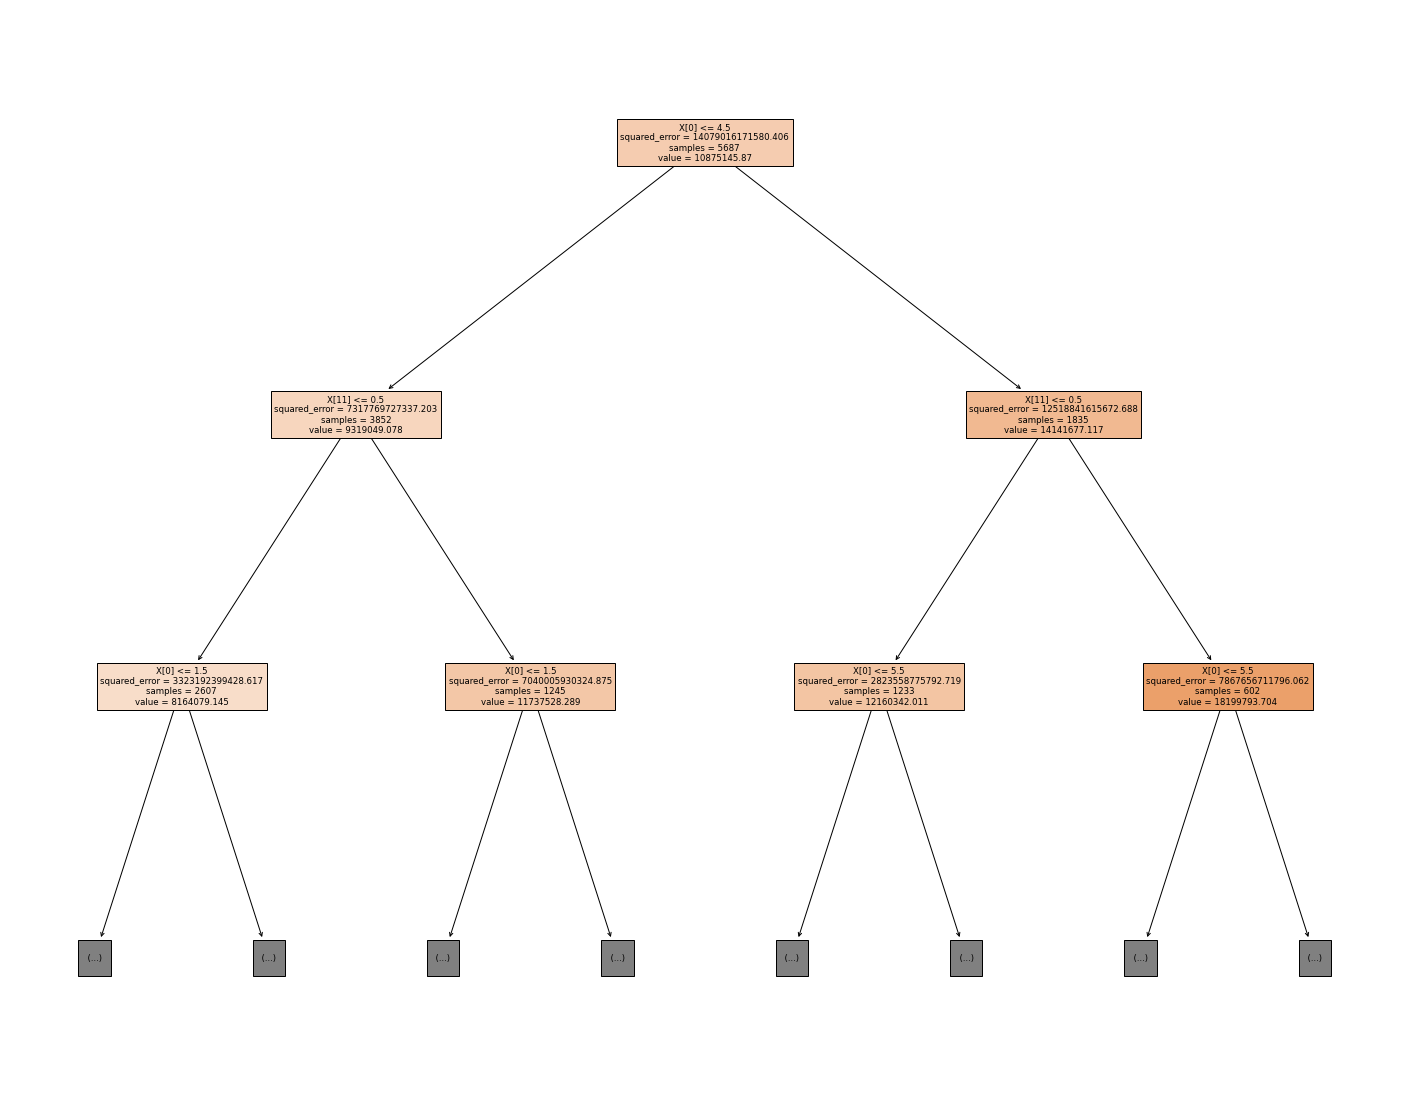

In [172]:
from sklearn.tree import plot_tree
plt.figure(figsize =(25,20))
plot_tree(dtc, max_depth =2, filled = True)
plt.show()

In [173]:
y_pred = dt.predict(X_test)
y_pred

array([ 9980320., 14054970., 13457270., ...,  7387000.,  9481950.,
       14702890.])

In [174]:
from sklearn.metrics import r2_score
r_score = r2_score(y_test,y_pred)
print(f'R^2 Score: {r_score}')

Test set R2 of dt: 0.98


## Random Forest

In [190]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 100, max_depth = 3, max_features='sqrt')

In [191]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [192]:
pred_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_result

,Actual,Predicted
6107,9866820,1.150579e+07
6964,14238410,1.290885e+07
6580,13547020,1.208560e+07
1036,14048900,1.101911e+07
1469,7439700,8.257143e+06
...,...,...
6279,12181500,1.100776e+07
6190,13491940,1.273417e+07
1828,6408750,8.366743e+06
5125,9387600,9.563447e+06


In [193]:
r_score = r2_score(y_test,y_pred)
print(f'R^2 Score: {r_score}')

R^2 Score: 0.77


In [206]:
importances = list(rf.feature_importances_)
original_feature_list = list(df.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(original_feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
for pair in feature_importances:
  print(f'Variable: {pair[0]}---------> Importance: {pair[1]}')

Variable: AREA---------> Importance: 0.24
Variable: AGE---------> Importance: 0.23
Variable: INT_SQFT---------> Importance: 0.2
Variable: N_ROOM---------> Importance: 0.11
Variable: MZZONE---------> Importance: 0.08
Variable: Commercial---------> Importance: 0.06
Variable: N_BEDROOM---------> Importance: 0.04
Variable: House---------> Importance: 0.02
Variable: N_BATHROOM---------> Importance: 0.0
Variable: SALE_COND---------> Importance: 0.0
Variable: PARK_FACIL---------> Importance: 0.0
Variable: UTILITY_AVAIL---------> Importance: 0.0
Variable: STREET---------> Importance: 0.0
Variable: SALES_PRICE---------> Importance: 0.0


The most important features are:
1. Area/ Location of the House
2. Age of the house
3. SQFT Area of the Houese

## XG Boost

In [207]:
import warnings
warnings.filterwarnings('ignore')

In [208]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np

In [209]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  xgboost = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  xgboost.fit(X_train, y_train)
  xgboost.score(X_test, y_test)
  print("Learning rate : ", lr, "   Train score : ", xgboost.score(X_train,y_train), "   Cross-Val score : ", np.mean(cross_val_score(xgboost, X_train, y_train, cv=10)))

Learning rate :  0.01    Train score :  -0.38724545587620995    Cross-Val score :  -0.3927569871003339
Learning rate :  0.02    Train score :  0.7448468440110441    Cross-Val score :  0.7418775252676915
Learning rate :  0.03    Train score :  0.9239519083764871    Cross-Val score :  0.9215458278554095
Learning rate :  0.04    Train score :  0.9618996668836912    Cross-Val score :  0.9595967118084641
Learning rate :  0.05    Train score :  0.9744879704487971    Cross-Val score :  0.971969892533125
Learning rate :  0.1    Train score :  0.9918263350847826    Cross-Val score :  0.9905465120635164
Learning rate :  0.11    Train score :  0.9936464720988931    Cross-Val score :  0.9917732609260443
Learning rate :  0.12    Train score :  0.9940409068770497    Cross-Val score :  0.992870765144761
Learning rate :  0.13    Train score :  0.9947798279804357    Cross-Val score :  0.9934865038956164
Learning rate :  0.14    Train score :  0.9954349099228488    Cross-Val score :  0.9943468985436091


In [210]:
xgboost = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity = 0)
xgboost.fit(X_train, y_train)
score = xgboost.score(X_test, y_test)
print(f'R^2 Score: {score}')

R^2 Score: 0.9971875132707452


In [212]:
importances = list(xgboost.feature_importances_)
original_feature_list = list(df.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(original_feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
for pair in feature_importances:
  print(f'Variable: {pair[0]}---------> Importance: {pair[1]}')

Variable: AGE---------> Importance: 0.38999998569488525
Variable: AREA---------> Importance: 0.3799999952316284
Variable: PARK_FACIL---------> Importance: 0.05999999865889549
Variable: INT_SQFT---------> Importance: 0.03999999910593033
Variable: STREET---------> Importance: 0.029999999329447746
Variable: MZZONE---------> Importance: 0.029999999329447746
Variable: Commercial---------> Importance: 0.019999999552965164
Variable: N_BEDROOM---------> Importance: 0.009999999776482582
Variable: N_BATHROOM---------> Importance: 0.009999999776482582
Variable: SALE_COND---------> Importance: 0.009999999776482582
Variable: N_ROOM---------> Importance: 0.0
Variable: UTILITY_AVAIL---------> Importance: 0.0
Variable: SALES_PRICE---------> Importance: 0.0
Variable: House---------> Importance: 0.0


The Most Important Features are:
1. Age of the House
2. Area/Location of the House

To get better Sales Figures, the Seller must check for the Age of the House and Area where the House resides.